In [76]:
import pandas as pd
import kagglehub
import os

dataset_path = kagglehub.dataset_download("alejopaullier/new-york-city-weather-data-2019")

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            data_path = os.path.join(root, file)
            break
    else:
        continue
    break

weather_data = pd.read_csv(data_path)


print(weather_data.head())
print(weather_data.info())



     date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0  1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1  2/1/19    41    35  38.0        2.1   27    0             0        0   
2  3/1/19    45    39  42.0        6.3   23    0             T        0   
3  4/1/19    47    37  42.0        6.5   23    0             0        0   
4  5/1/19    47    42  44.5        9.1   20    0          0.45        0   

  snow_depth  
0          0  
1          0  
2          0  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   tmax           365 non-null    int64  
 2   tmin           365 non-null    int64  
 3   tavg           365 non-null    float64
 4   departure      365 non-null    float64
 5   HDD            365 non-null    int64  
 6

In [77]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%y')

In [19]:
import matplotlib.pyplot as plt

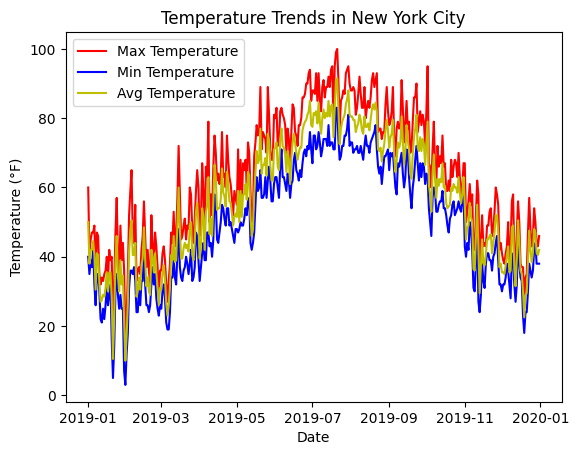

In [20]:


plt.plot(weather_data["date"],weather_data["tmax"],label="Max Temperature",color="r")
plt.plot(weather_data["date"],weather_data["tmin"],label="Min Temperature",color="b")
plt.plot(weather_data["date"],weather_data["tavg"],label="Avg Temperature",color="y")
plt.title("Temperature Trends in New York City")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.show()

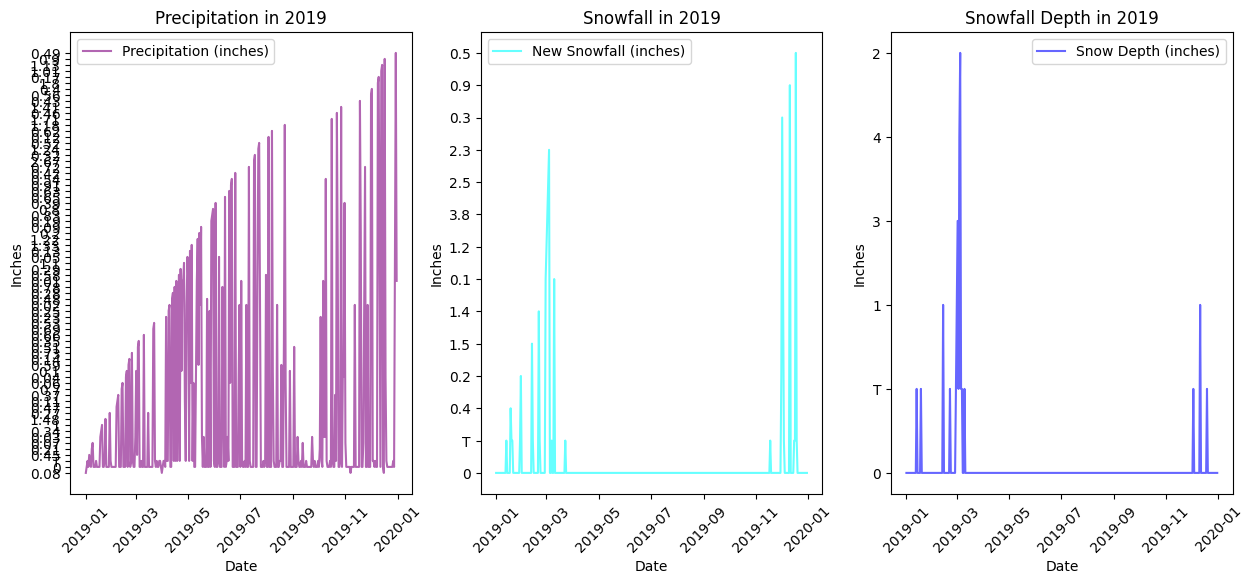

In [63]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.plot(weather_data['date'], weather_data['precipitation'], label='Precipitation (inches)', color='purple', alpha=0.6)
plt.title("Precipitation in 2019")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()

plt.subplot(1,3,2)
plt.plot(weather_data['date'], weather_data['new_snow'], label='New Snowfall (inches)', color='cyan',  alpha=0.6)
plt.title("Snowfall in 2019")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()

plt.subplot(1,3,3)
plt.plot(weather_data["date"],weather_data["snow_depth"],label="Snow Depth (inches)",color="blue",alpha=0.6)
plt.title("Snowfall Depth in 2019")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
plt.show()

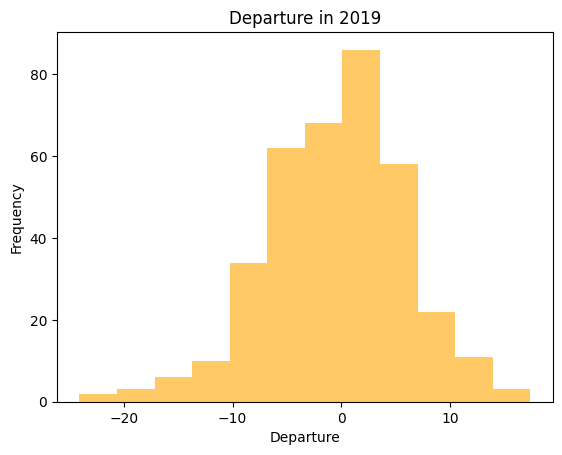

In [38]:
plt.hist(weather_data["departure"],bins=12,color="orange",alpha=0.6)
plt.title("Departure in 2019")
plt.xlabel("Departure")
plt.ylabel("Frequency")
plt.show()

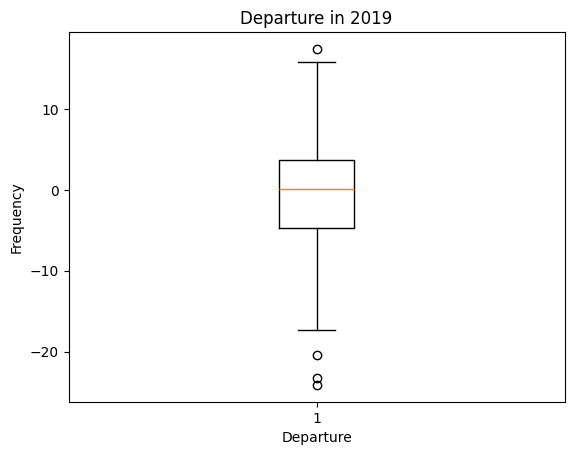

In [40]:
plt.boxplot(weather_data["departure"])
plt.title("Departure in 2019")
plt.xlabel("Departure")
plt.ylabel("Frequency")
plt.show()

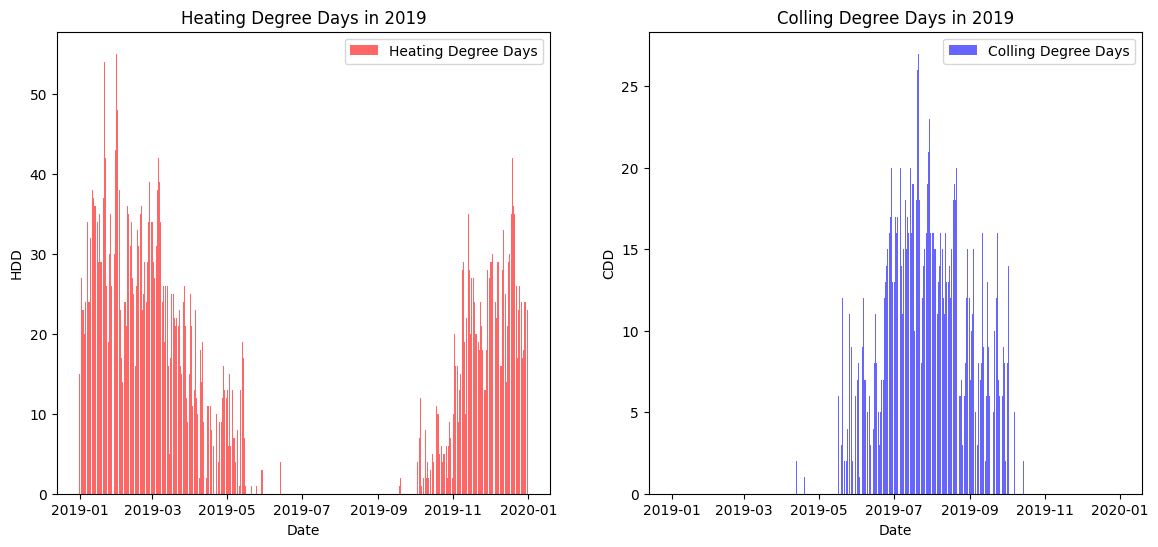

In [46]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.bar(weather_data["date"],weather_data["HDD"],color="red",alpha=0.6,label="Heating Degree Days")
plt.title("Heating Degree Days in 2019")
plt.xlabel("Date")
plt.ylabel("HDD")
plt.legend()

plt.subplot(1,2,2)
plt.bar(weather_data["date"],weather_data["CDD"],color="blue",alpha=0.6,label="Colling Degree Days")
plt.title("Colling Degree Days in 2019")
plt.xlabel("Date")
plt.ylabel("CDD")
plt.legend()
plt.show()

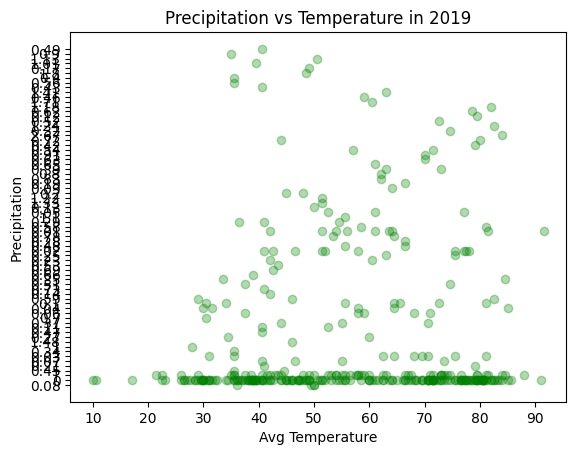

In [57]:
plt.scatter(weather_data["tavg"],weather_data['precipitation'],color="g",alpha=0.3)
plt.title("Precipitation vs Temperature in 2019")
plt.xlabel("Avg Temperature")
plt.ylabel("Precipitation")
plt.show()

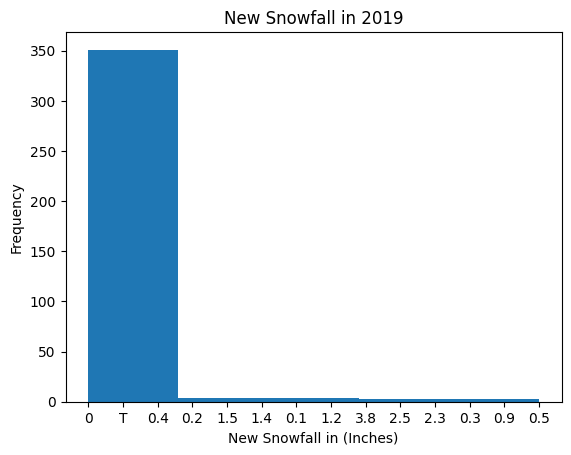

In [73]:
plt.hist(weather_data["new_snow"],bins=5)
plt.title("New Snowfall in 2019")
plt.xlabel("New Snowfall in (Inches)")
plt.ylabel("Frequency")
plt.show()

In [78]:
monthly_data = weather_data.groupby(weather_data['date'].dt.month)[['HDD', 'CDD']].sum().reset_index()

monthly_data.rename(columns={'date': 'Month'}, inplace=True)

print(monthly_data)

    Month  HDD  CDD
0       1  979    0
1       2  811    0
2       3  730    0
3       4  318    3
4       5  145   59
5       6    4  243
6       7    0  520
7       8    0  404
8       9    3  226
9      10  151   29
10     11  607    0
11     12  801    0


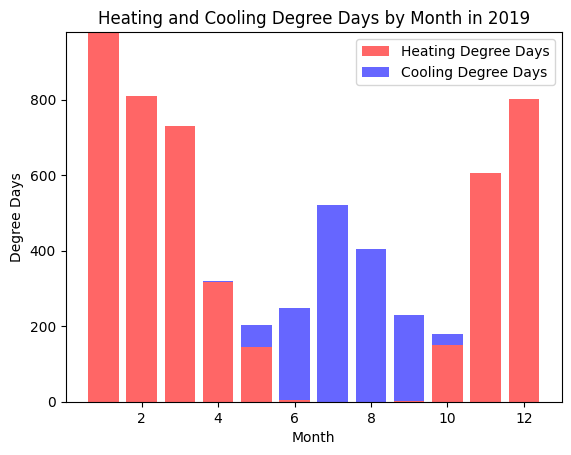

In [75]:
plt.bar(monthly_data['Month'], monthly_data['HDD'], label='Heating Degree Days', color='red', alpha=0.6)
plt.bar(monthly_data['Month'], monthly_data['CDD'], bottom=monthly_data['HDD'], label='Cooling Degree Days', color='blue', alpha=0.6)  # Stack CDD on top of HDD

plt.title("Heating and Cooling Degree Days by Month in 2019")
plt.xlabel("Month")
plt.ylabel("Degree Days")
plt.legend()